In [216]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [217]:
# Function to check if a degree sequence is graphical
def is_graphical(seq):
    # Sort the sequence in non-increasing order
    seq = sorted(seq, reverse=True)
    # Check if the sum of the sequence is even
    if sum(seq) % 2 != 0:
        return False
    # Generate the Havel-Hakimi graph
    while seq:
        # Remove the first element of the sequence
        d = seq.pop(0)
        # Check if the sequence is too short
        if len(seq) < d:
            return False
        # Subtract 1 from the first d elements of the sequence
        for i in range(d):
            seq[i] -= 1
        # Remove any zeros from the sequence
        seq = [x for x in seq if x != 0]
        # Sort the sequence in non-increasing order
        seq = sorted(seq, reverse=True)
    # If the sequence can be reduced to an empty sequence, then it is graphical
    return True

In [218]:
def generate_degree_sequence(p, n):
    # Create empty degree sequence
    degree_sequence = [0] * n

    # Generate degree for each node
    for i in range(n):
        r = random.random()
        for j in range(len(p)):
            if r < sum(p[:j+1]):
                degree_sequence[i] = j
                break

    # Check if the degree sequence is valid
    if not is_graphical(degree_sequence):
        # If not valid, try again recursively
        return generate_degree_sequence(p, n)

    return degree_sequence

In [219]:
def plot_graph(degseq):
    n = len(degseq)
    mat = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            if (degseq[i] > 0 and degseq[j] > 0):
                degseq[i] -= 1
                degseq[j] -= 1
                mat[i][j] = 1
                mat[j][i] = 1
    return mat  

In [220]:
# Example probability distribution
p = [0,0.34, 0.16, 0.34, 0.16]

# Example number of nodes
n = 6

In [221]:
# Generate degree sequence
degree_sequence = generate_degree_sequence(p, n)
degree_sequence.sort(reverse=True)
print(degree_sequence)
mat = plot_graph(degree_sequence)

# Create a NetworkX graph from the adjacency matrix
G = nx.Graph(mat)

[4, 4, 3, 3, 2, 2]


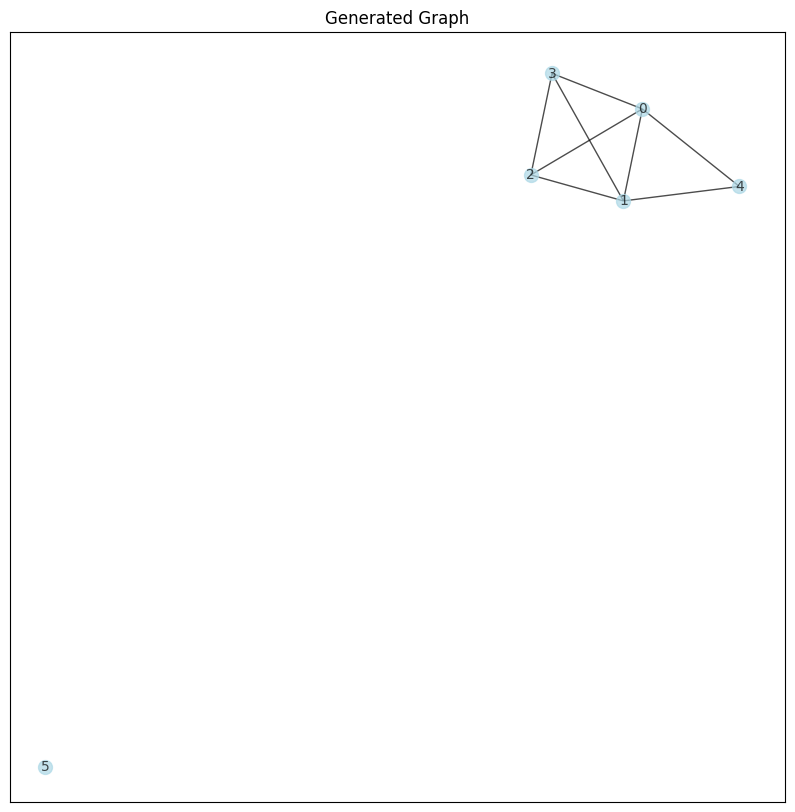

In [222]:
# Positions of nodes using the spring layout algorithm
pos = nx.spring_layout(G, k=0.3)

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx(G, pos, with_labels=True, node_size=100, font_size=10, node_color='lightblue', edge_color='black', width=1.0, alpha=0.7, ax=ax)

# Set the title of the plot
ax.set_title("Generated Graph")

# Show the graph
plt.show()